In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv("../../air_quality_datasets/air_quality_no2_long.csv")
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [3]:
air_quality = air_quality.rename(columns={"date.utc":"datetime"})

In [4]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

# How to handle time series data with ease
## Using pandas datetime properties

We want to work with the dates in the column `datetime` as datetime objects, and *not* as plain text.

In [6]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [7]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially:
* the values in `datetime` are strings and *do not* provide any datetime operations. (e.g. extract the year, day of the week, etc.)
* By applying the `to_datetime` fucntion, pandas interprets the strings and convert these to datetime (i.e. `datetime64[ns, UTC]`) *objects*.
* In pandas, we call these datetime onjects similar to `datetime.datetime` from the standard library as `pandas.Timestamp`.

#### Note:
* As many datasets *do contain datetime info* in one of the columns, pandas input functions, like `pandas.read_csv()` and `pandas.read_json()` can do the transformation to dates when reading the data using the `parse_dates` parameter with a list of the columns to reas as Timestamp:

```
pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])
```

Why are these `pandas.Timestamp` objects useful? Let’s illustrate the added value with some example cases.

#### What is the start and end date of the time series data set we are working with?



In [8]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

##### Using `pandas.Timestamp` for datetimes enables us to calculate with date information and make them comparable. Therefore, we can use this to get the length of our time series:

In [9]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

The result is a `pandas.Timedelta`object, similar to `datetime.timedelta` from the standard Python library and defining a _**time duration.**_
The various time concepts supported by pandas are explained in the user guide section on <a href="https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-overview">time related concepts</a>.

Let's say that now, we want to create a new column and add it to the `DataFrame`. This column should contain *only* the month of the measurement. 

In [10]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


By using `Timestamp` objects for dates, a lot of time-related properties are provided by pandas. For example, the `month`, but also `year`, `quarter`,... All of these properties are accessible by the `dt` accessor. 

An overview of the existing date properties is given in the time and date components overview table. More details about the dt accessor to return datetime like properties are explained in a dedicated section on the dt accessor.

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components <br>
https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors

## What is the average concentration for each day of the week for each of the measurement locations?

In [11]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Remember the split-apply-combine pattern provided by `groupby` from the tutorial on statistics calculation? Here, we want to calculate a given statistic (e.g. mean *NO<sub>2</sub>*) **for each weekday and for each measurement location**. 

To group on weekdays, we use the datetime property `weekday` (with Monday=0 and Sunday=6) of pandas `Timestamp`, which is also accessible by the `dt` accessor. The grouping on both locations and weekdays can be done to split the calculation of the mean on each of these combinations.

> **⚠️ Danger**  
> As we are working with a very short time series in these examples, the analysis does not provide a long-term representative result!

## Plot the typical NO<sub>2</sub> pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?


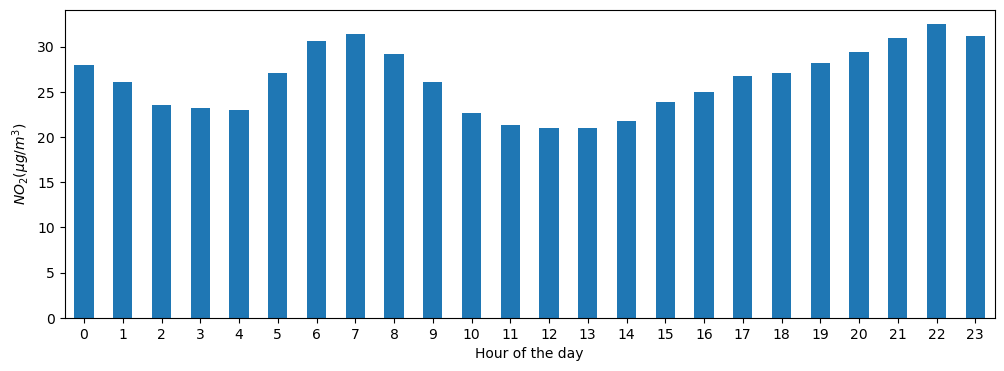

In [12]:
fig, axs = plt.subplots(figsize=(12,4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$");

Similar to the previous case, we want to calculate a given statistic  (e.g. mean *NO<sub>2</sub>*) **for each hour of the day** and we can use the split-apply-combine approach again. 

For this case, we use the datetime property `hour` of pandas `Timestamp`, which is also accessible by the `dt` accessor.

## Datetime as index

In the tutorial on reshaping tables, `pivot()` was introduced to reshape the data table with each of the measurements locations as a separate column:


In [13]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


> **ℹ️ Note**  
> By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the `set_index` function.

Working with a datetime index (i.e. `DatetimeIndex`) provides powerful functionalities. For example, we do not need the `dt` accessor to get the time series properties, but have these properties available on the index directly:


In [14]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let’s apply this on our data.

### Create a plot of the *NO<sub>2</sub>* values in the different stations from the 20th of May till the end of 21st of May



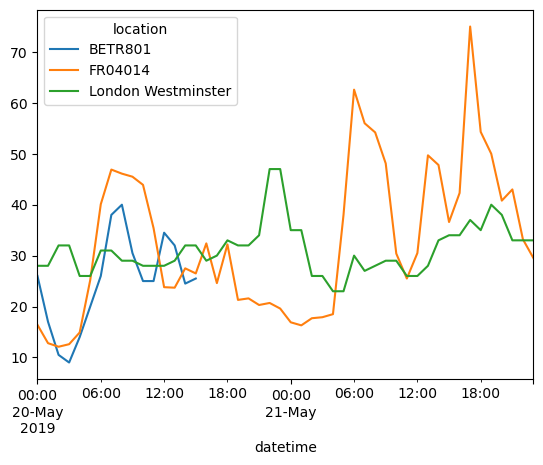

In [15]:
no_2["2019-05-20":"2019-05-21"].plot();


By providing a **string that parses to a datetime**, a specific subset of the data can be selected on a `DatetimeIndex`.
More information on the `DatetimeIndex` and the slicing by using strings is provided in the section on <a href="https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-datetimeindex">time series indexing.</a>

## Resample a time series to another frequency

Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [16]:
monthly_max = no_2.resample("ME").max()

In [17]:
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


This showcases a very *powerful* method on time series data witha datetime index, which is the ability to `resample()` time series to another frequency (e.g., converting secondly data into 5-minutely data).

The `resample()` method is similar to a `groupby()` operation.

* it provides a time-based grouping, by using a string (e.g. `M`, `5H`,...) that defines the target frequency
* it requires an aggregation function such as mean, max,...

An overview of the aliases used to define time series frequencies is given in the offset aliases overview table. <br>
https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

When defined,  the frequency of the time series is provided by the `freq` attribute:

In [18]:
monthly_max.index.freq

<MonthEnd>

Make a plot of the daily mean NO<sub>2</sub> value in each of the stations.

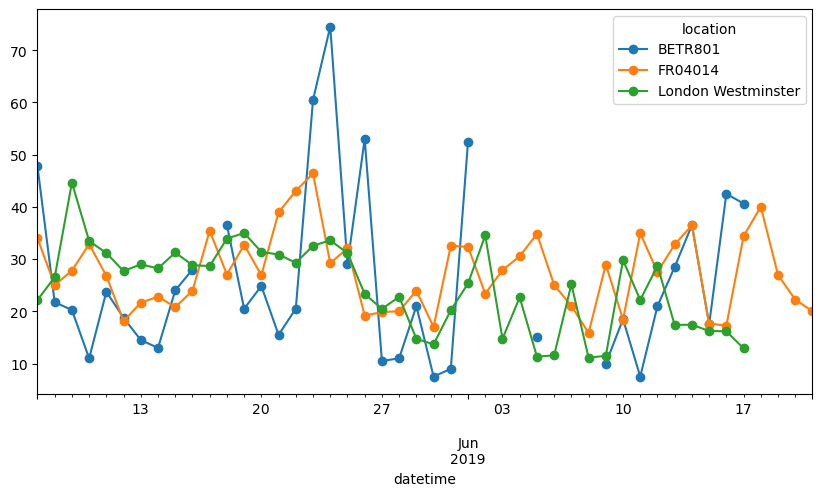

In [19]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));


More details on the power of time series resampling is provided in the user guide section on resampling. <br> https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-resampling

## REMEMBER: 
* Valid date strings can be converted to datetime objects using `to_datetime` funct or as part of read functs.
* Datetime objects in pandas support calculations, logical operations and convenient date-related properties using the `dt` accessor.
* A `DatetimeIndex` contains these date-related properties  and supports convenient slicing.
* `resample()` is a powerful method to change the frequency of a time series. 